In [4]:
# Google Colab에서 한글 폰트 설정
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 31 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetyp

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

가상 판매 데이터가 '판매_데이터.csv' 파일로 저장되었습니다.

판매_데이터.csv 파일을 불러옵니다...
데이터 불러오기 완료!
행 수: 365, 열 수: 9

데이터 미리보기:
          날짜         판매량       가격         온도        광고비   할인율  요일  월  이벤트
0 2023-01-01  109.967142  10000.0  13.796339  54.013436   0.0   6  1    0
1 2023-01-02   98.931212   8000.0  15.152646  71.825070  20.0   0  1    0
2 2023-01-03  107.104518  10000.0  11.387726  46.304784   0.0   1  1    0
3 2023-01-04  116.171554   8000.0  17.930931  52.045494  20.0   2  1    0
4 2023-01-05   98.913114  10000.0  15.218270  39.684238   0.0   3  1    0

데이터 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      365 non-null    datetime64[ns]
 1   판매량     365 non-null    float64       
 2   가격      365 non-null    float64       
 3   온도      365 non-null    float64       
 4   광고비     365 non-null    float64       
 5   할인율     365 non-null    

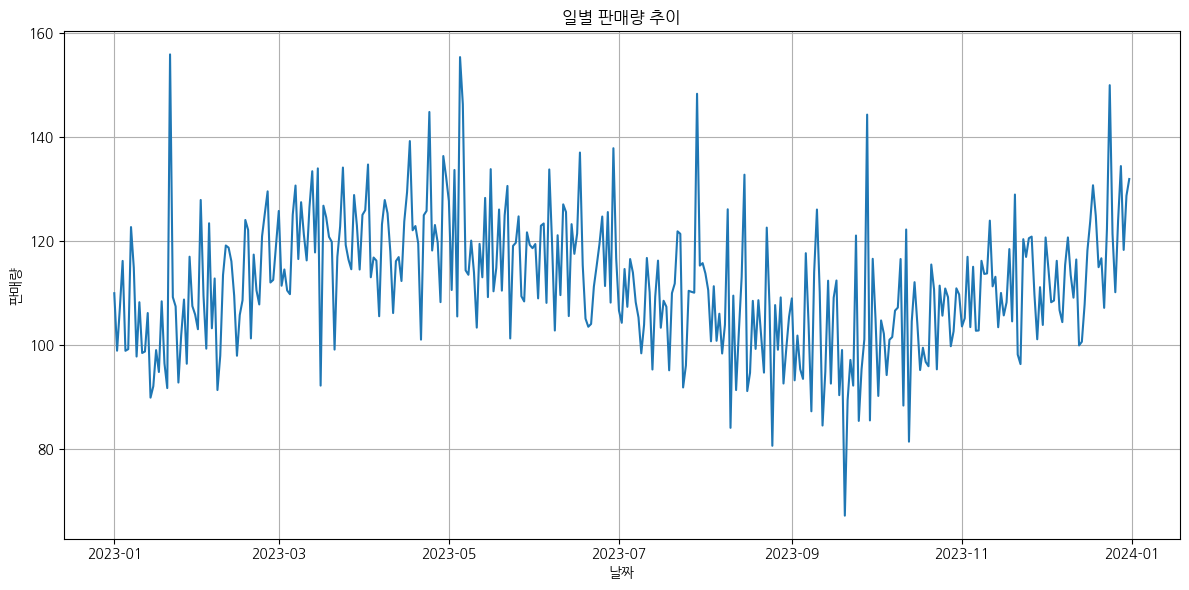

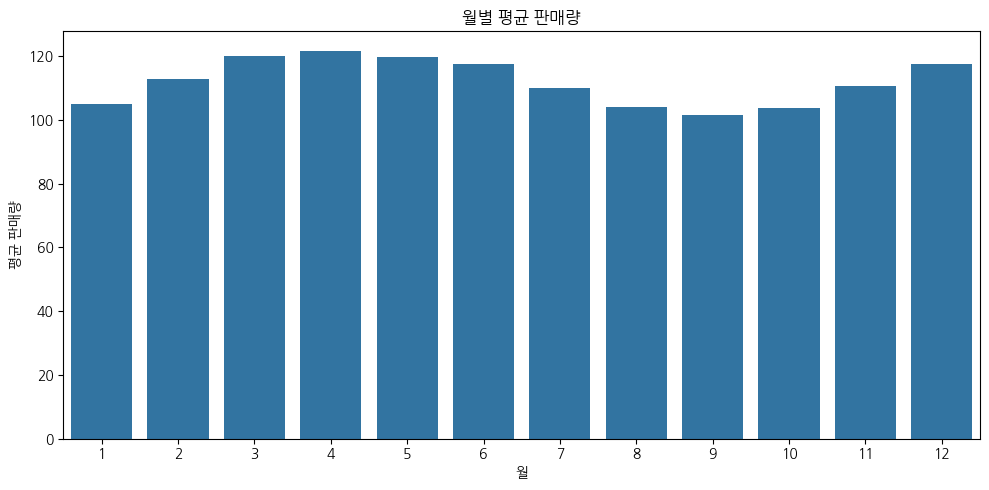

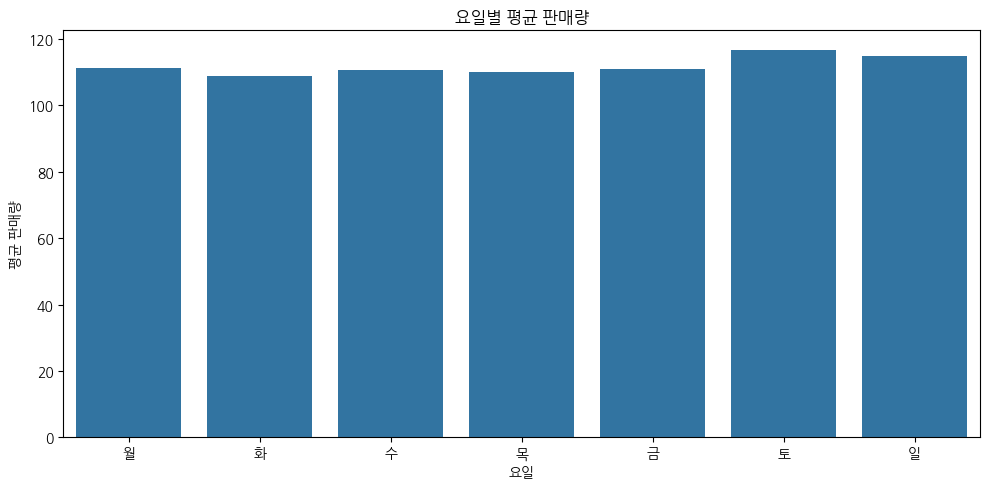

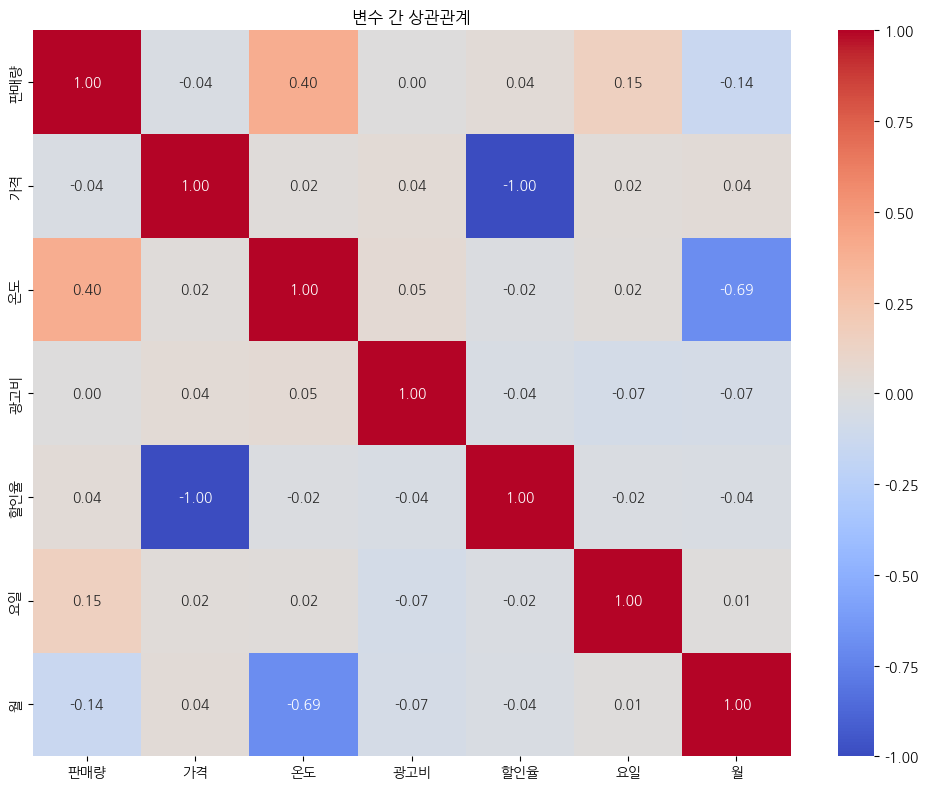

<Figure size 1200x1000 with 0 Axes>

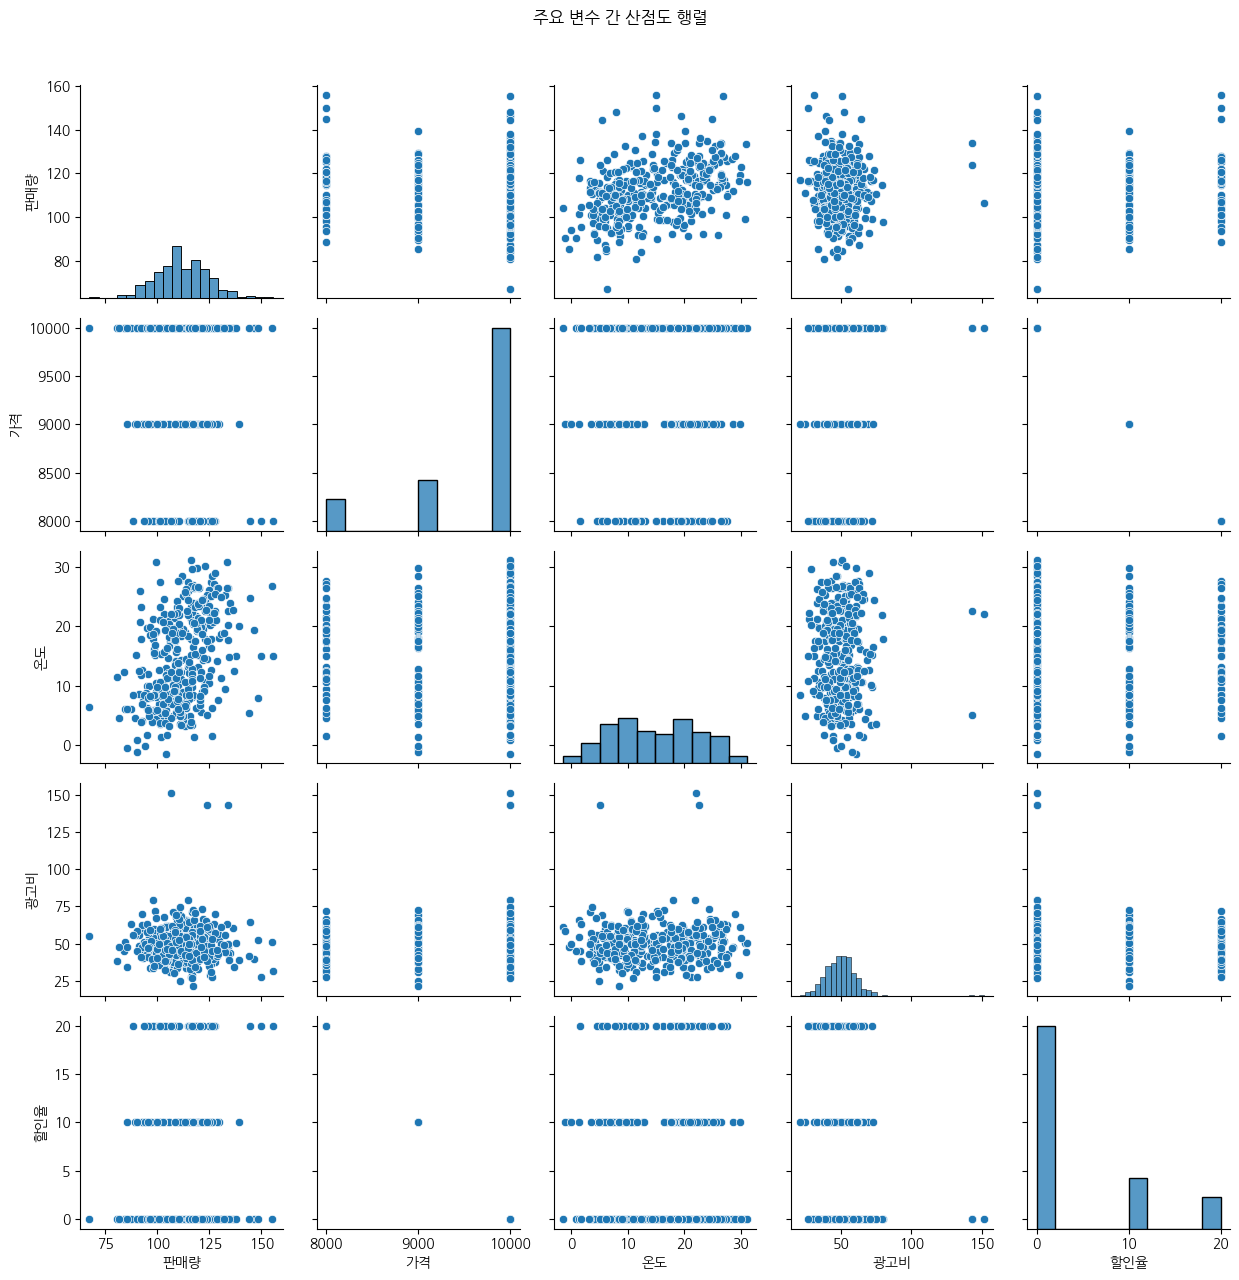


특성 공학 시작...


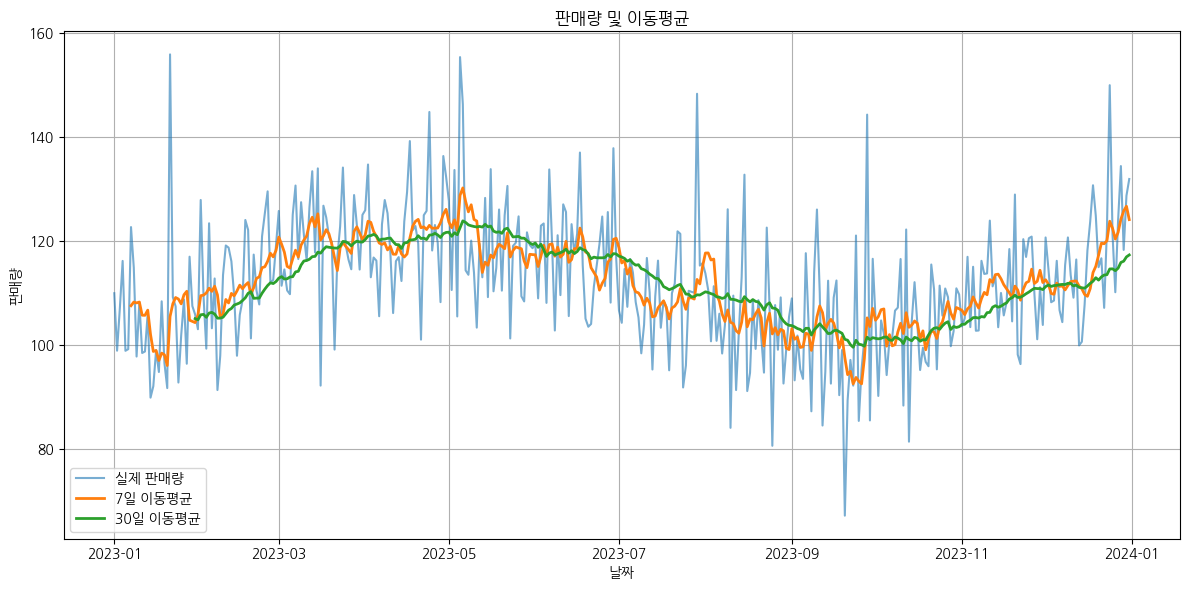

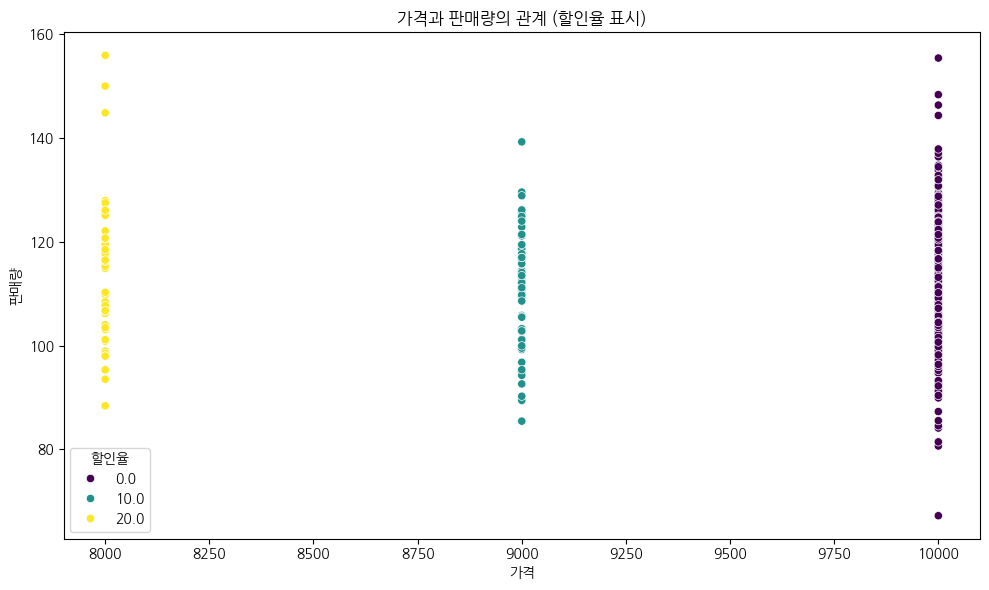

특성 공학 완료!

예측 모델 구축 시작...

모델 평가 결과:
선형 회귀 모델 성능:
훈련 세트 RMSE: 10.78
테스트 세트 RMSE: 8.72
훈련 세트 R²: 0.34
테스트 세트 R²: 0.22
랜덤 포레스트 모델 성능:
훈련 세트 RMSE: 4.32
테스트 세트 RMSE: 14.11
훈련 세트 R²: 0.89
테스트 세트 R²: -1.05


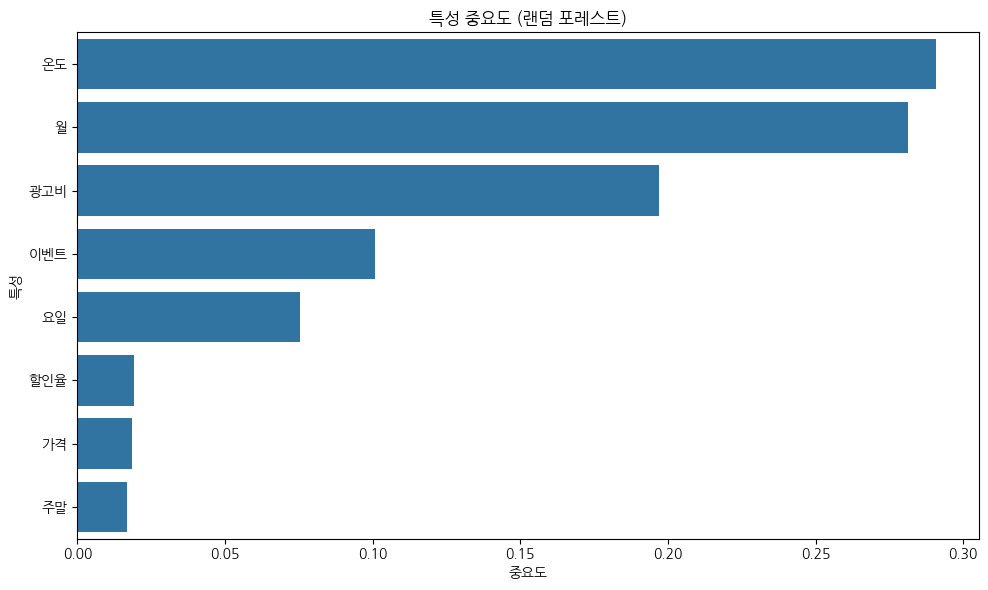

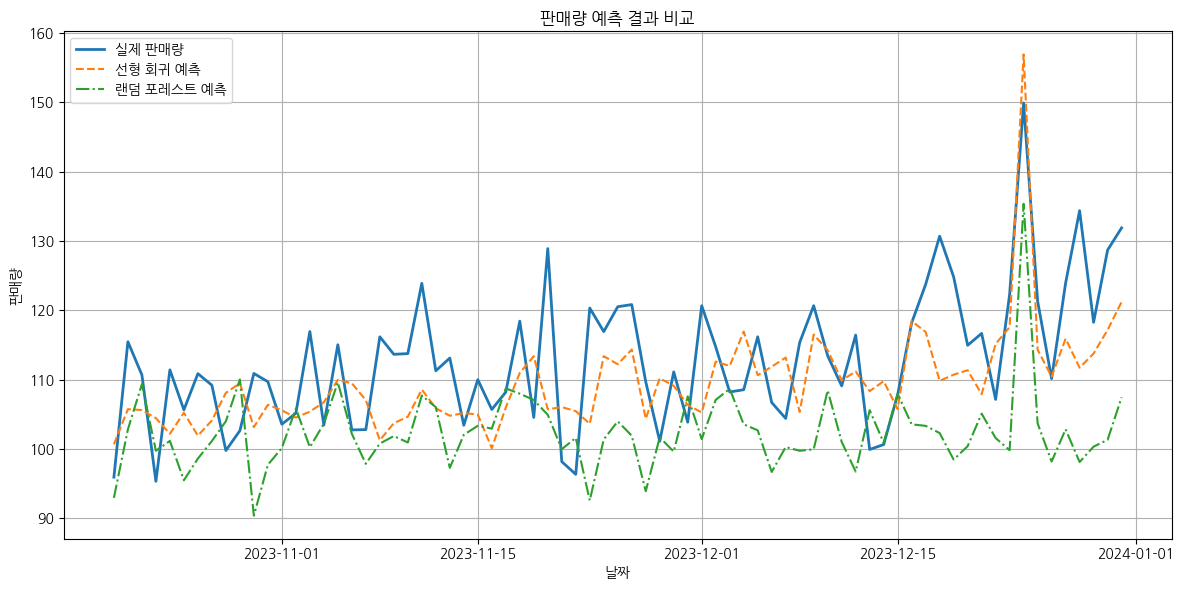

예측 모델 구축 완료!

미래 수요 예측 시작...
예측 결과가 '판매량_예측결과.csv' 파일로 저장되었습니다.


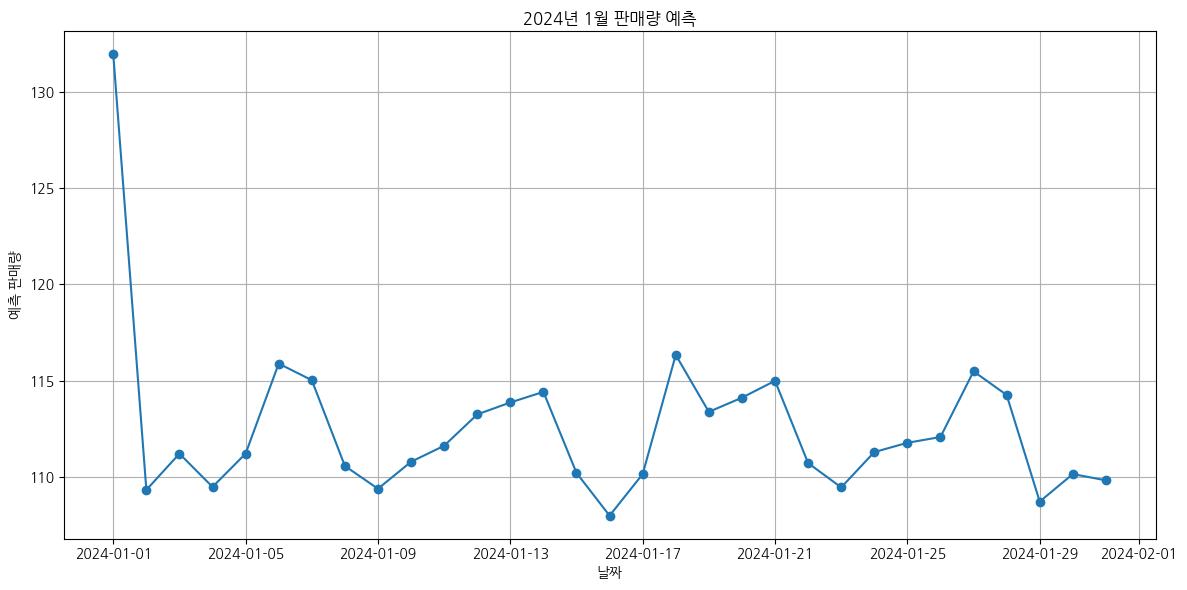


최적화 시뮬레이션 시작...
최적화 결과가 '최적화_결과.csv' 파일로 저장되었습니다.

최적의 가격 및 광고비 조합:
가격: 12000원
광고비: 30만원
예상 판매량: 137.5개
예상 수익: 1620121원


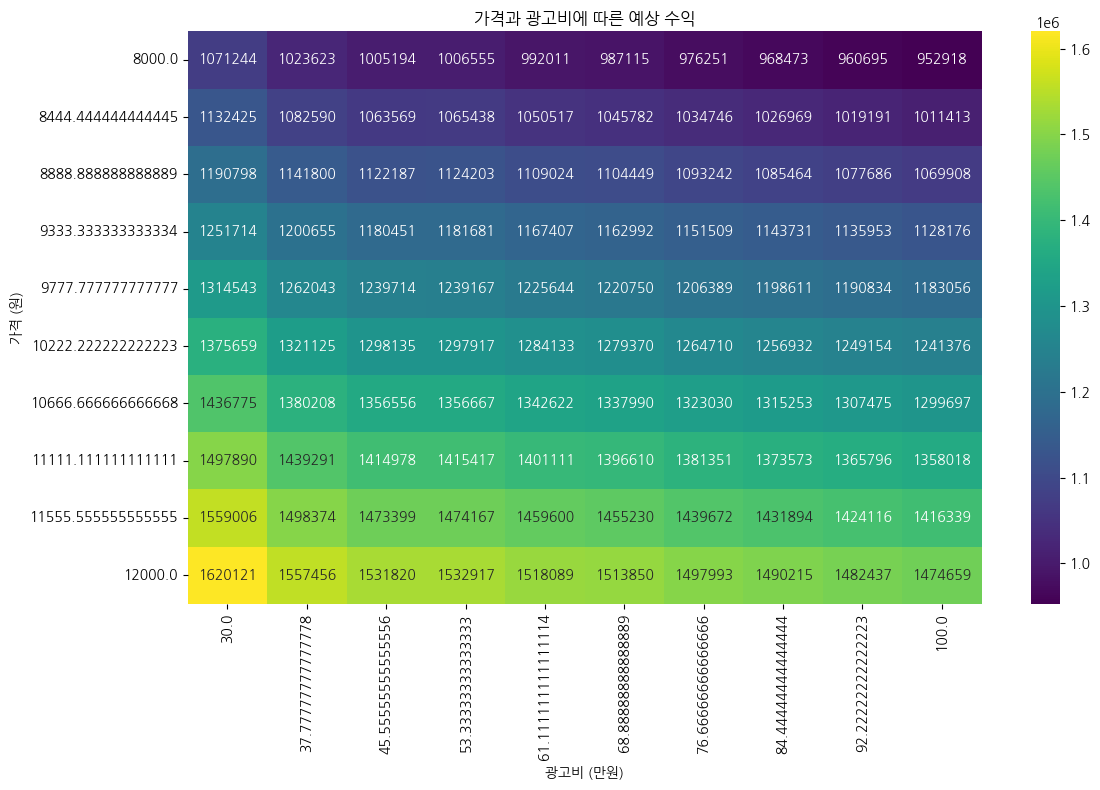


판매 데이터 분석 및 수요 예측 완료!


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (Colab에서 한글 표시를 위함)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 1. 가상 판매 데이터 생성 및 CSV 저장
def 가상데이터_생성_및_저장():
    np.random.seed(42)

    # 날짜 생성 (1년치)
    날짜 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

    # 기본 판매량에 계절성 추가
    기본_판매량 = np.random.normal(loc=100, scale=10, size=len(날짜))
    계절성 = 15 * np.sin(np.linspace(0, 2*np.pi, len(날짜)))
    트렌드 = np.linspace(0, 20, len(날짜))  # 상승 트렌드

    # 주말에 판매량 증가
    요일_효과 = np.array([5 if i.dayofweek >= 5 else 0 for i in 날짜])

    # 특수 이벤트 (할인행사, 명절 등)
    이벤트 = np.zeros(len(날짜))
    이벤트_날짜 = ['2023-01-21', '2023-05-05', '2023-08-15', '2023-09-28', '2023-12-24']
    for 날 in 이벤트_날짜:
        이벤트[날짜 == 날] = 30

    # 최종 판매량
    판매량 = 기본_판매량 + 계절성 + 트렌드 + 요일_효과 + 이벤트
    판매량 = np.maximum(판매량, 0)  # 음수 판매량 방지

    # 가격 설정
    기본_가격 = 10000
    할인율 = np.random.choice([0, 0.1, 0.2], size=len(날짜), p=[0.7, 0.2, 0.1])
    가격 = 기본_가격 * (1 - 할인율)

    # 날씨 데이터 (온도)
    평균_온도 = 15 + 10 * np.sin(np.linspace(0, 2*np.pi, len(날짜)))  # 1년 주기의 온도 변화
    온도 = 평균_온도 + np.random.normal(0, 3, len(날짜))

    # 광고 지출
    광고비 = np.random.normal(loc=50, scale=10, size=len(날짜))
    특별_광고 = np.zeros(len(날짜))
    특별_광고_날짜 = ['2023-03-15', '2023-07-01', '2023-11-11']
    for 날 in 특별_광고_날짜:
        특별_광고[날짜 == 날] = 100
    광고비 = 광고비 + 특별_광고

    # 데이터프레임 생성
    데이터 = pd.DataFrame({
        '날짜': 날짜,
        '판매량': 판매량,
        '가격': 가격,
        '온도': 온도,
        '광고비': 광고비,
        '할인율': 할인율 * 100,  # 퍼센트로 변환
        '요일': [i.dayofweek for i in 날짜],
        '월': [i.month for i in 날짜]
    })

    # 이벤트 여부 추가
    데이터['이벤트'] = 0
    for 날 in 이벤트_날짜:
        데이터.loc[데이터['날짜'] == 날, '이벤트'] = 1

    # CSV 파일로 저장
    데이터.to_csv('판매_데이터.csv', index=False)
    print("가상 판매 데이터가 '판매_데이터.csv' 파일로 저장되었습니다.")

    return 데이터

# 가상 데이터 생성 및 저장
원본_데이터 = 가상데이터_생성_및_저장()

# 2. CSV 파일 불러오기
def CSV_데이터_불러오기(파일명='판매_데이터.csv'):
    print(f"\n{파일명} 파일을 불러옵니다...")
    데이터 = pd.read_csv(파일명)

    # 날짜 열을 날짜 형식으로 변환
    데이터['날짜'] = pd.to_datetime(데이터['날짜'])

    print("데이터 불러오기 완료!")
    print(f"행 수: {데이터.shape[0]}, 열 수: {데이터.shape[1]}")
    print("\n데이터 미리보기:")
    print(데이터.head())

    return 데이터

# CSV 파일 불러오기
데이터 = CSV_데이터_불러오기()

# 3. 데이터 탐색 및 시각화
def 데이터_탐색(데이터):
    print("\n데이터 기본 정보:")
    print(데이터.info())
    print("\n데이터 통계 요약:")
    print(데이터.describe())

    # 시계열 데이터 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(데이터['날짜'], 데이터['판매량'])
    plt.title('일별 판매량 추이')
    plt.xlabel('날짜')
    plt.ylabel('판매량')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 월별 판매량 평균
    월별_판매량 = 데이터.groupby('월')['판매량'].mean().reset_index()
    plt.figure(figsize=(10, 5))
    sns.barplot(x='월', y='판매량', data=월별_판매량)
    plt.title('월별 평균 판매량')
    plt.xlabel('월')
    plt.ylabel('평균 판매량')
    plt.tight_layout()
    plt.show()

    # 요일별 판매량 평균
    요일별_판매량 = 데이터.groupby('요일')['판매량'].mean().reset_index()
    요일_이름 = ['월', '화', '수', '목', '금', '토', '일']
    요일별_판매량['요일_이름'] = 요일별_판매량['요일'].apply(lambda x: 요일_이름[x])
    plt.figure(figsize=(10, 5))
    sns.barplot(x='요일_이름', y='판매량', data=요일별_판매량)
    plt.title('요일별 평균 판매량')
    plt.xlabel('요일')
    plt.ylabel('평균 판매량')
    plt.tight_layout()
    plt.show()

    # 상관관계 분석
    상관관계 = 데이터[['판매량', '가격', '온도', '광고비', '할인율', '요일', '월']].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(상관관계, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('변수 간 상관관계')
    plt.tight_layout()
    plt.show()

    # 산점도 행렬
    plt.figure(figsize=(12, 10))
    변수 = ['판매량', '가격', '온도', '광고비', '할인율']
    sns.pairplot(데이터[변수])
    plt.suptitle('주요 변수 간 산점도 행렬', y=1.02)
    plt.tight_layout()
    plt.show()

# 데이터 탐색 실행
데이터_탐색(데이터)

# 4. 특성 공학 (Feature Engineering)
def 특성_공학(데이터):
    print("\n특성 공학 시작...")

    # 날짜 관련 특성 추가
    데이터['년'] = 데이터['날짜'].dt.year
    데이터['분기'] = 데이터['날짜'].dt.quarter
    데이터['주'] = 데이터['날짜'].dt.isocalendar().week
    데이터['주말'] = 데이터['요일'].apply(lambda x: 1 if x >= 5 else 0)

    # 이동평균 특성 추가
    데이터['7일_이동평균'] = 데이터['판매량'].rolling(window=7).mean()
    데이터['30일_이동평균'] = 데이터['판매량'].rolling(window=30).mean()

    # 판매량 이동평균 비교
    plt.figure(figsize=(12, 6))
    plt.plot(데이터['날짜'], 데이터['판매량'], label='실제 판매량', alpha=0.6)
    plt.plot(데이터['날짜'], 데이터['7일_이동평균'], label='7일 이동평균', linewidth=2)
    plt.plot(데이터['날짜'], 데이터['30일_이동평균'], label='30일 이동평균', linewidth=2)
    plt.title('판매량 및 이동평균')
    plt.xlabel('날짜')
    plt.ylabel('판매량')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 가격 변동에 따른 판매량 변화
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='가격', y='판매량', hue='할인율', data=데이터, palette='viridis')
    plt.title('가격과 판매량의 관계 (할인율 표시)')
    plt.xlabel('가격')
    plt.ylabel('판매량')
    plt.tight_layout()
    plt.show()

    print("특성 공학 완료!")
    return 데이터

# 특성 공학 실행
데이터 = 특성_공학(데이터)

# 5. 예측 모델 구축
def 예측_모델_구축(데이터):
    print("\n예측 모델 구축 시작...")

    # 결측치 처리
    데이터 = 데이터.fillna(0)

    # 예측을 위한 특성 선택
    특성 = ['가격', '온도', '광고비', '할인율', '요일', '월', '주말', '이벤트']
    목표 = '판매량'

    # 훈련 및 테스트 세트 분리
    X = 데이터[특성]
    y = 데이터[목표]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # 선형 회귀 모델
    선형_모델 = LinearRegression()
    선형_모델.fit(X_train, y_train)

    # 랜덤 포레스트 모델
    랜덤_포레스트 = RandomForestRegressor(n_estimators=100, random_state=42)
    랜덤_포레스트.fit(X_train, y_train)

    # 모델 평가
    def 모델_평가(모델, 모델명):
        train_pred = 모델.predict(X_train)
        test_pred = 모델.predict(X_test)

        train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))

        train_r2 = r2_score(y_train, train_pred)
        test_r2 = r2_score(y_test, test_pred)

        print(f"{모델명} 모델 성능:")
        print(f"훈련 세트 RMSE: {train_rmse:.2f}")
        print(f"테스트 세트 RMSE: {test_rmse:.2f}")
        print(f"훈련 세트 R²: {train_r2:.2f}")
        print(f"테스트 세트 R²: {test_r2:.2f}")

        return test_pred

    print("\n모델 평가 결과:")
    선형_예측 = 모델_평가(선형_모델, "선형 회귀")
    랜덤_포레스트_예측 = 모델_평가(랜덤_포레스트, "랜덤 포레스트")

    # 특성 중요도 시각화 (랜덤 포레스트)
    중요도 = pd.DataFrame({
        '특성': 특성,
        '중요도': 랜덤_포레스트.feature_importances_
    }).sort_values('중요도', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='중요도', y='특성', data=중요도)
    plt.title('특성 중요도 (랜덤 포레스트)')
    plt.xlabel('중요도')
    plt.ylabel('특성')
    plt.tight_layout()
    plt.show()

    # 예측 결과 시각화
    테스트_데이터 = 데이터.iloc[X_test.index]
    테스트_데이터['선형_예측'] = 선형_예측
    테스트_데이터['랜덤_포레스트_예측'] = 랜덤_포레스트_예측

    plt.figure(figsize=(12, 6))
    plt.plot(테스트_데이터['날짜'], 테스트_데이터['판매량'], label='실제 판매량', linewidth=2)
    plt.plot(테스트_데이터['날짜'], 테스트_데이터['선형_예측'], label='선형 회귀 예측', linestyle='--')
    plt.plot(테스트_데이터['날짜'], 테스트_데이터['랜덤_포레스트_예측'], label='랜덤 포레스트 예측', linestyle='-.')
    plt.title('판매량 예측 결과 비교')
    plt.xlabel('날짜')
    plt.ylabel('판매량')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("예측 모델 구축 완료!")
    return 선형_모델, 랜덤_포레스트, 특성

# 예측 모델 구축 실행
선형_모델, 랜덤_포레스트, 특성 = 예측_모델_구축(데이터)

# 6. 미래 수요 예측 시뮬레이션
def 미래_수요_예측(랜덤_포레스트, 특성):
    print("\n미래 수요 예측 시작...")

    # 2024년 1월 예측을 위한 가상 데이터 생성
    예측_날짜 = pd.date_range(start='2024-01-01', end='2024-01-31', freq='D')
    예측_데이터 = pd.DataFrame({
        '날짜': 예측_날짜,
        '가격': np.random.normal(loc=10000, scale=500, size=len(예측_날짜)),
        '온도': 5 + np.random.normal(0, 2, len(예측_날짜)),  # 1월 온도
        '광고비': np.random.normal(loc=50, scale=10, size=len(예측_날짜)),
        '할인율': np.random.choice([0, 10, 20], size=len(예측_날짜), p=[0.7, 0.2, 0.1]),
        '요일': [i.dayofweek for i in 예측_날짜],
        '월': [i.month for i in 예측_날짜],
        '주말': [1 if i.dayofweek >= 5 else 0 for i in 예측_날짜],
        '이벤트': [1 if i.day == 1 else 0 for i in 예측_날짜]  # 1월 1일은 이벤트로 가정
    })

    # 예측
    예측_데이터['판매량_예측'] = 랜덤_포레스트.predict(예측_데이터[특성])

    # CSV로 저장
    예측_데이터.to_csv('판매량_예측결과.csv', index=False)
    print("예측 결과가 '판매량_예측결과.csv' 파일로 저장되었습니다.")

    # 예측 결과 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(예측_데이터['날짜'], 예측_데이터['판매량_예측'], marker='o')
    plt.title('2024년 1월 판매량 예측')
    plt.xlabel('날짜')
    plt.ylabel('예측 판매량')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return 예측_데이터

# 미래 수요 예측 실행
예측_데이터 = 미래_수요_예측(랜덤_포레스트, 특성)

# 7. 최적화 시뮬레이션
def 최적화_시뮬레이션(랜덤_포레스트, 특성, 예측_데이터):
    print("\n최적화 시뮬레이션 시작...")

    # 다양한 가격과 광고비 조합에 따른 예상 판매량 계산
    가격_범위 = np.linspace(8000, 12000, 10)
    광고비_범위 = np.linspace(30, 100, 10)

    최적화_결과 = []
    기준_데이터 = 예측_데이터.iloc[0].copy()  # 첫 번째 날짜의 데이터를 기준으로 사용

    for 가격 in 가격_범위:
        for 광고비 in 광고비_범위:
            시뮬레이션 = 기준_데이터.copy()
            시뮬레이션['가격'] = 가격
            시뮬레이션['광고비'] = 광고비

            # 단일 행 예측을 위해 2D 배열로 변환
            예측_특성 = np.array([시뮬레이션[특성]]).reshape(1, -1)
            예상_판매량 = 랜덤_포레스트.predict(예측_특성)[0]

            # 수익 계산
            수익 = 예상_판매량 * 가격 - 광고비 * 1000  # 광고비 단위를 1000원으로 가정

            최적화_결과.append({
                '가격': 가격,
                '광고비': 광고비,
                '예상_판매량': 예상_판매량,
                '수익': 수익
            })

    최적화_df = pd.DataFrame(최적화_결과)

    # CSV로 저장
    최적화_df.to_csv('최적화_결과.csv', index=False)
    print("최적화 결과가 '최적화_결과.csv' 파일로 저장되었습니다.")

    # 최적 조합 찾기
    최적_조합 = 최적화_df.loc[최적화_df['수익'].idxmax()]
    print("\n최적의 가격 및 광고비 조합:")
    print(f"가격: {최적_조합['가격']:.0f}원")
    print(f"광고비: {최적_조합['광고비']:.0f}만원")
    print(f"예상 판매량: {최적_조합['예상_판매량']:.1f}개")
    print(f"예상 수익: {최적_조합['수익']:.0f}원")

    # 최적화 결과 히트맵
    pivot_table = 최적화_df.pivot_table(values='수익', index='가격', columns='광고비')
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='viridis')
    plt.title('가격과 광고비에 따른 예상 수익')
    plt.xlabel('광고비 (만원)')
    plt.ylabel('가격 (원)')
    plt.tight_layout()
    plt.show()

# 최적화 시뮬레이션 실행
최적화_시뮬레이션(랜덤_포레스트, 특성, 예측_데이터)

print("\n판매 데이터 분석 및 수요 예측 완료!")